In [9]:
!pip install ultralytics

  Using cached ultralytics-8.3.54-py3-none-any.whl.metadata (35 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of ultralytics to determine which version is compatible with other requirements. This could take a while.
  Using cached ultralytics-8.3.53-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.52-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.51-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.50-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.49-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.48-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics-8.3.47-py3-none-any.whl.metadata (35 kB)
INFO: pip is still looking at multiple versions of ultralytics to determine which version

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\New folder\.venv\Scripts\python.exe C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8fb51d9cba28\vendored-meson\meson\meson.py setup C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8fb51d9cba28 C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8fb51d9cba28\.mesonpy-sr00b9pw -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8fb51d9cba28\.mesonpy-sr00b9pw\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8fb51d9cba28
      Build dir: C:\Users\acer\AppData\Local\Temp\pip-install-ahr4dgyo\numpy_6913115d896f4ab5982d8

In [10]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'ultralytics'

In [3]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 52.7MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


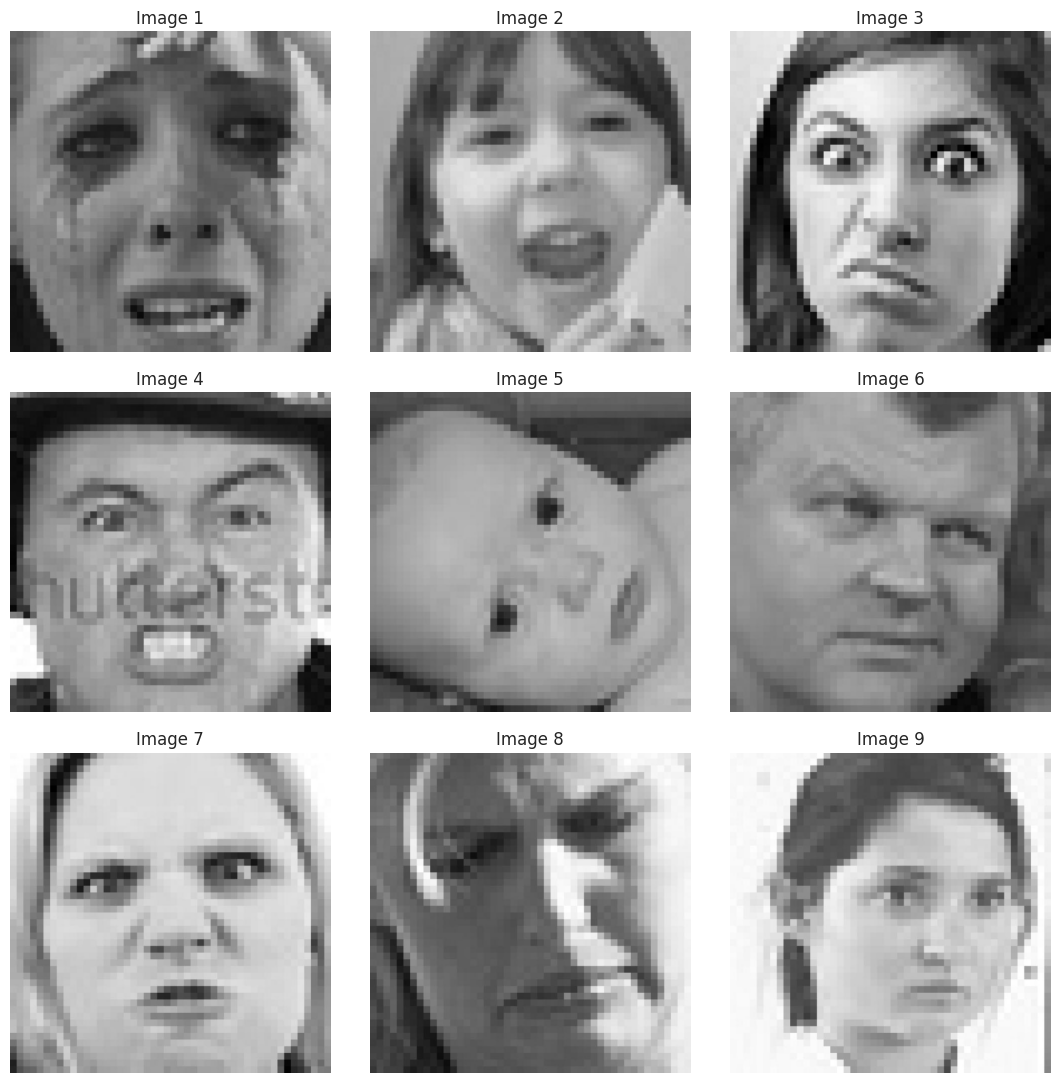

In [5]:
# Path ke folder di Google Drive
Image_dir = '/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/images/103_jpg.rf.06b700ea468d0eeae9d6e362465014eb.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.



image 1/1 /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/images/103_jpg.rf.06b700ea468d0eeae9d6e362465014eb.jpg: 640x640 (no detections), 341.2ms
Speed: 9.8ms preprocess, 341.2ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)


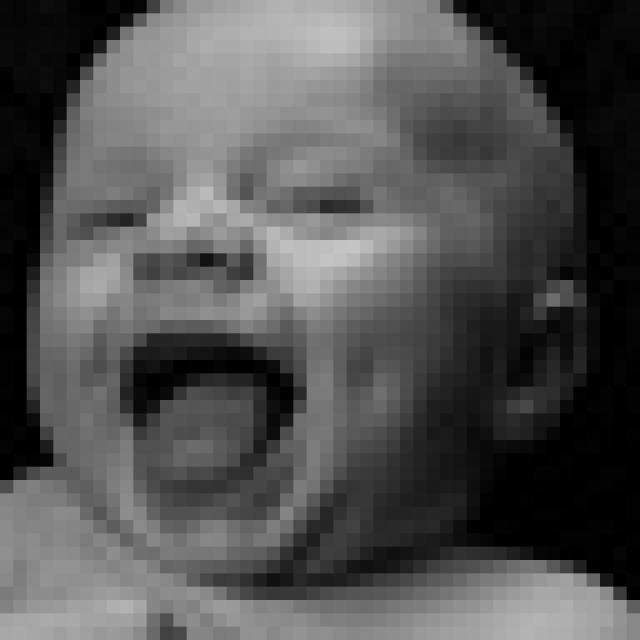

In [7]:
# Use a pretrained YOLOv8n model
model = YOLO("yolo11n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/images/103_jpg.rf.06b700ea468d0eeae9d6e362465014eb.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [8]:
# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/data.yaml",epochs = 10, batch = -1, optimizer = 'auto')

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/data.yaml, epochs=10, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 21.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/labels... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:54<00:00,  1.26it/s]

train: New cache created: /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:  ⚠️ intended for CUDA devices, using default batch-size 16


train: Scanning /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/train/labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:17<00:00,  1.15it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.461      5.048      3.218          5        640: 100%|██████████| 5/5 [01:08<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.71s/it]

                   all         20         20    0.00392          1      0.202      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.572      4.409      2.714          5        640: 100%|██████████| 5/5 [00:54<00:00, 10.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.54s/it]

                   all         20         20    0.00359          1      0.252       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.095      3.946      2.192          5        640: 100%|██████████| 5/5 [00:53<00:00, 10.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.43s/it]

                   all         20         20    0.00378          1       0.43      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9586      3.683      1.945          5        640: 100%|██████████| 5/5 [00:54<00:00, 10.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.91s/it]

                   all         20         20    0.00421          1      0.399      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9058      3.609      1.864          5        640: 100%|██████████| 5/5 [00:52<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all         20         20    0.00503          1      0.424      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.026        3.4      1.986          5        640: 100%|██████████| 5/5 [00:52<00:00, 10.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]

                   all         20         20    0.00556          1      0.345      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      0.924      3.367      1.864          5        640: 100%|██████████| 5/5 [00:55<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]

                   all         20         20     0.0064          1      0.341      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.002      3.332      1.912          5        640: 100%|██████████| 5/5 [00:55<00:00, 11.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

                   all         20         20    0.00687          1      0.337      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.9888      3.248      1.907          5        640: 100%|██████████| 5/5 [00:51<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

                   all         20         20    0.00693          1      0.351      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.9079      3.205      1.794          5        640: 100%|██████████| 5/5 [00:52<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.77s/it]

                   all         20         20    0.00676          1      0.352      0.252



10 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]


                   all         20         20    0.00677          1      0.352      0.252
                 happy          3          3    0.00163          1      0.171      0.112
                 marah          4          4    0.00488          1      0.262       0.12
            menjijikan          7          7    0.00232          1      0.367      0.288
                 sedih          6          6     0.0182          1      0.608      0.488
Speed: 2.8ms preprocess, 196.9ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


In [9]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

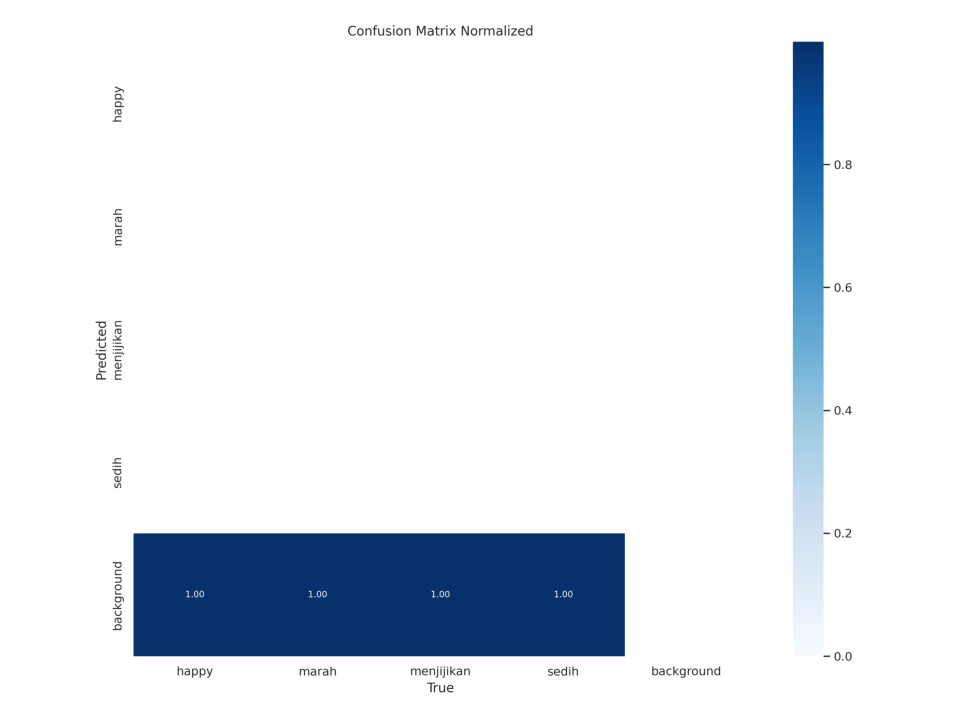

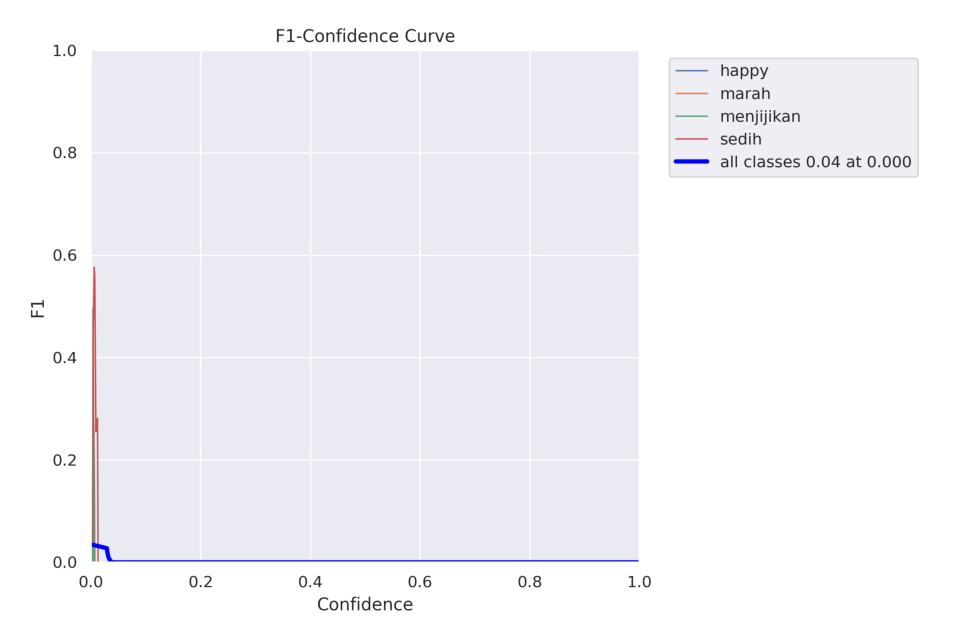

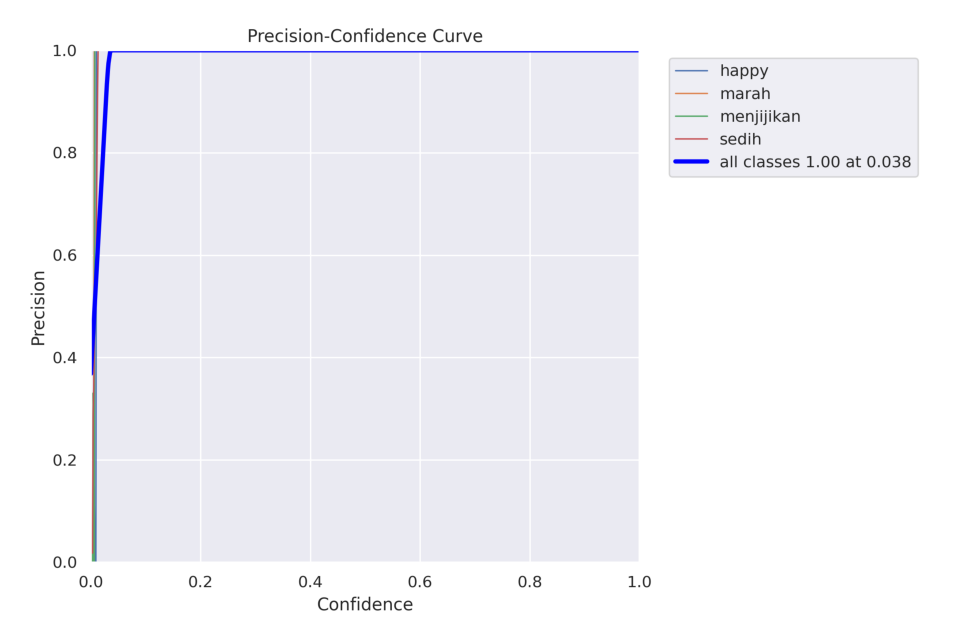

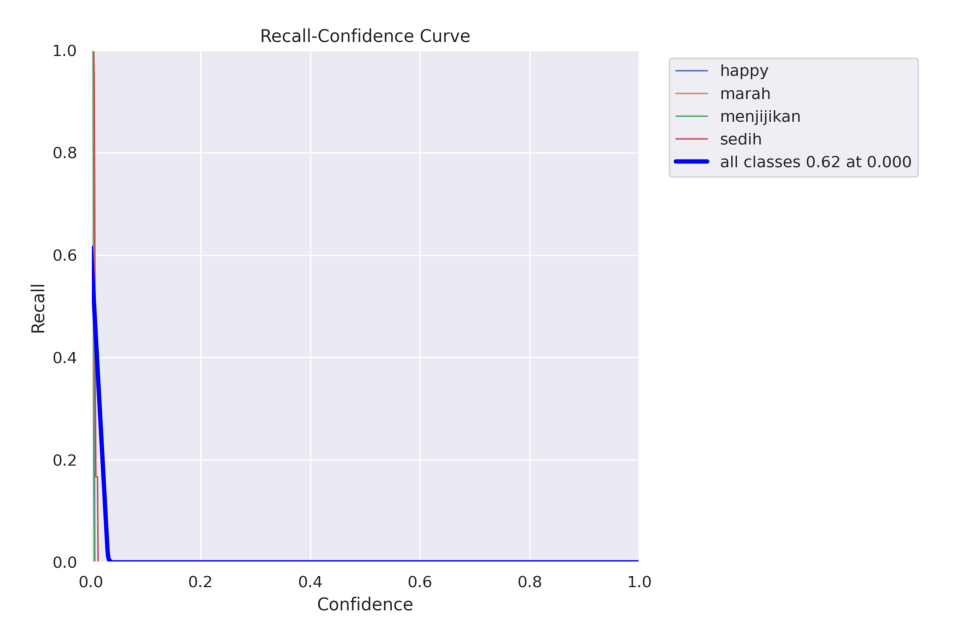

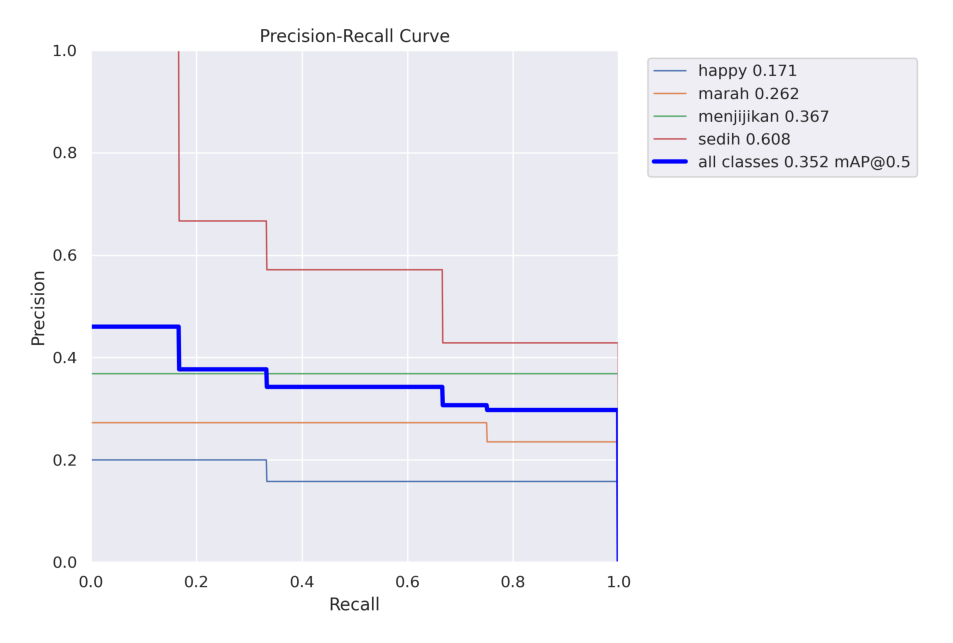

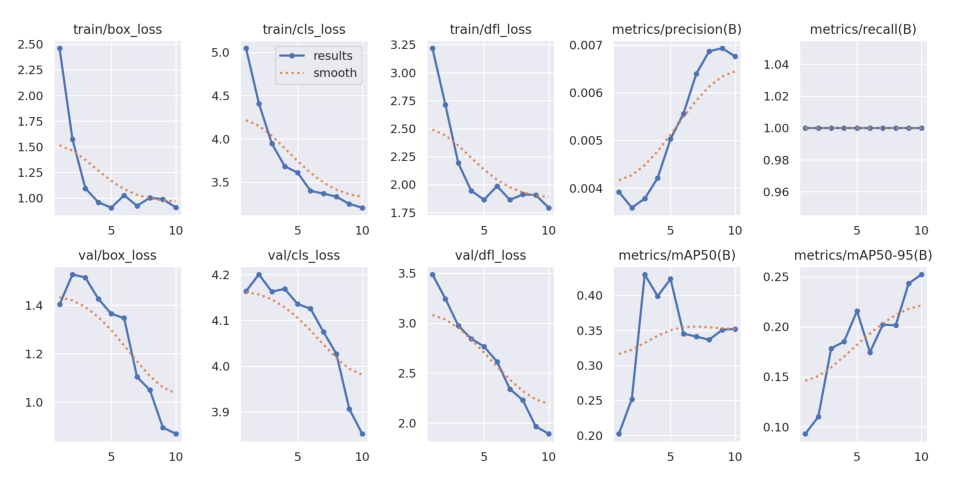

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [11]:
Result_Final_model = pd.read_csv('runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,84.8318,2.46068,5.04770,3.21787,0.00392,1,0.20238,0.09302,1.40311,4.16348,3.48871,0.000050,0.000050,0.000050
1,2,146.4110,1.57236,4.40908,2.71421,0.00359,1,0.25179,0.10991,1.52737,4.20049,3.24471,0.000101,0.000101,0.000101
2,3,207.3310,1.09458,3.94588,2.19193,0.00378,1,0.42997,0.17847,1.51417,4.16275,2.97544,0.000140,0.000140,0.000140
3,4,268.8900,0.95861,3.68319,1.94499,0.00421,1,0.39879,0.18513,1.42646,4.16882,2.84480,0.000167,0.000167,0.000167
4,5,328.1880,0.90582,3.60871,1.86430,0.00503,1,0.42358,0.21587,1.36470,4.13570,2.76532,0.000181,0.000181,0.000181
5,6,388.0190,1.02622,3.39986,1.98649,0.00556,1,0.34543,0.17454,1.34698,4.12551,2.61423,0.000183,0.000183,0.000183
6,7,450.3250,0.92403,3.36719,1.86353,0.00640,1,0.34104,0.20218,1.10401,4.07470,2.34023,0.000173,0.000173,0.000173
7,8,511.5240,1.00240,3.33176,1.91187,0.00687,1,0.33674,0.20136,1.04915,4.02696,2.22864,0.000150,0.000150,0.000150
8,9,569.8440,0.98881,3.24772,1.90734,0.00693,1,0.35091,0.24328,0.89483,3.90656,1.96421,0.000114,0.000114,0.000114
9,10,630.2950,0.90789,3.20471,1.79352,0.00676,1,0.35203,0.25239,0.86898,3.85228,1.89185,0.000067,0.000067,0.000067


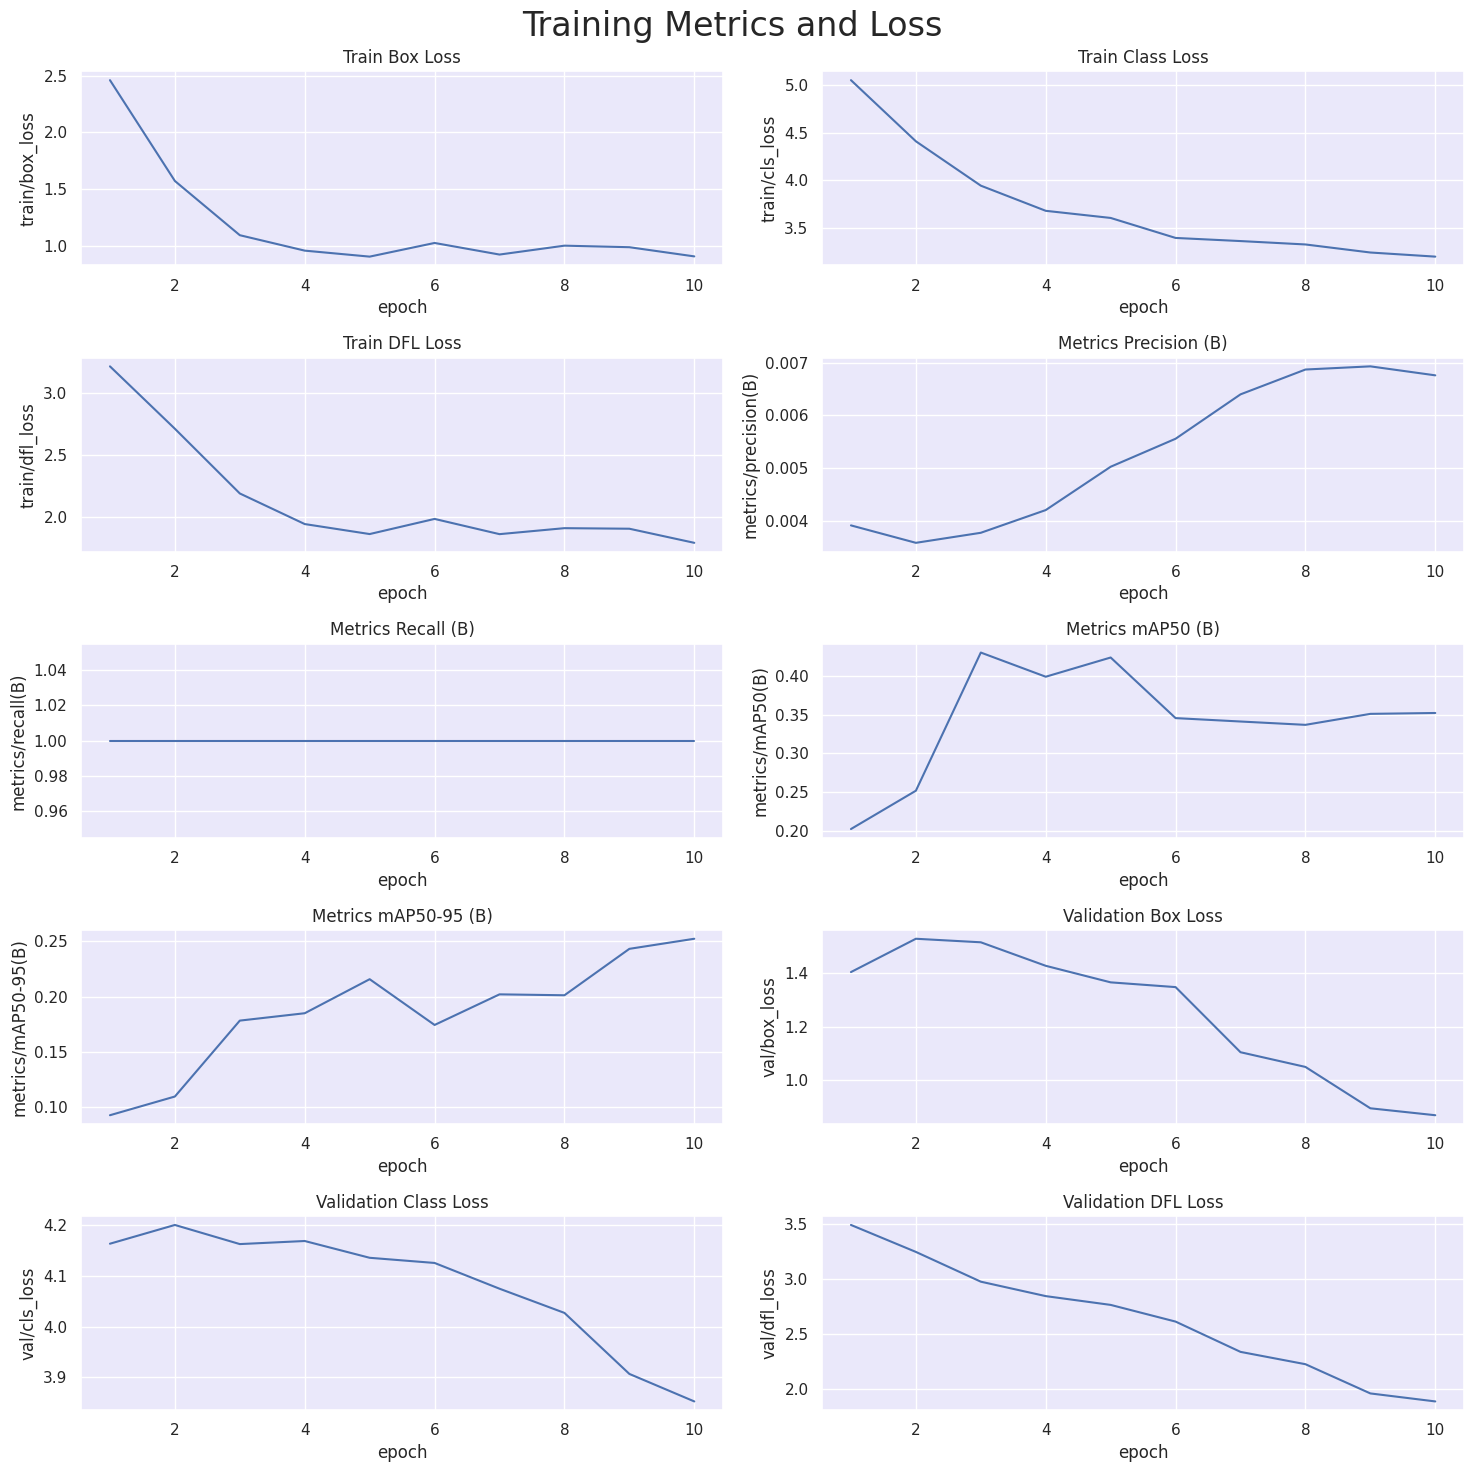

In [12]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [13]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train/weights/best.pt')

In [14]:
# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


                   all         20         20    0.00677          1      0.352      0.252
                 happy          3          3    0.00163          1      0.171      0.112
                 marah          4          4    0.00488          1      0.262       0.12
            menjijikan          7          7    0.00232          1      0.367      0.288
                 sedih          6          6     0.0182          1      0.608      0.488
Speed: 6.1ms preprocess, 321.7ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.006767680828015682
metrics/recall(B):  1.0
metrics/mAP50(B):  0.35203203865278176
metrics/mAP50-95(B):  0.25193261278810286



0: 640x640 (no detections), 190.8ms
Speed: 3.8ms preprocess, 190.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 172.4ms
Speed: 4.5ms preprocess, 172.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 173.7ms
Speed: 4.3ms preprocess, 173.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 170.7ms
Speed: 3.0ms preprocess, 170.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 179.4ms
Speed: 4.8ms preprocess, 179.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 171.6ms
Speed: 4.5ms preprocess, 171.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 190.6ms
Speed: 4.4ms preprocess, 190.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 172.4ms
Speed: 3.7ms prepr

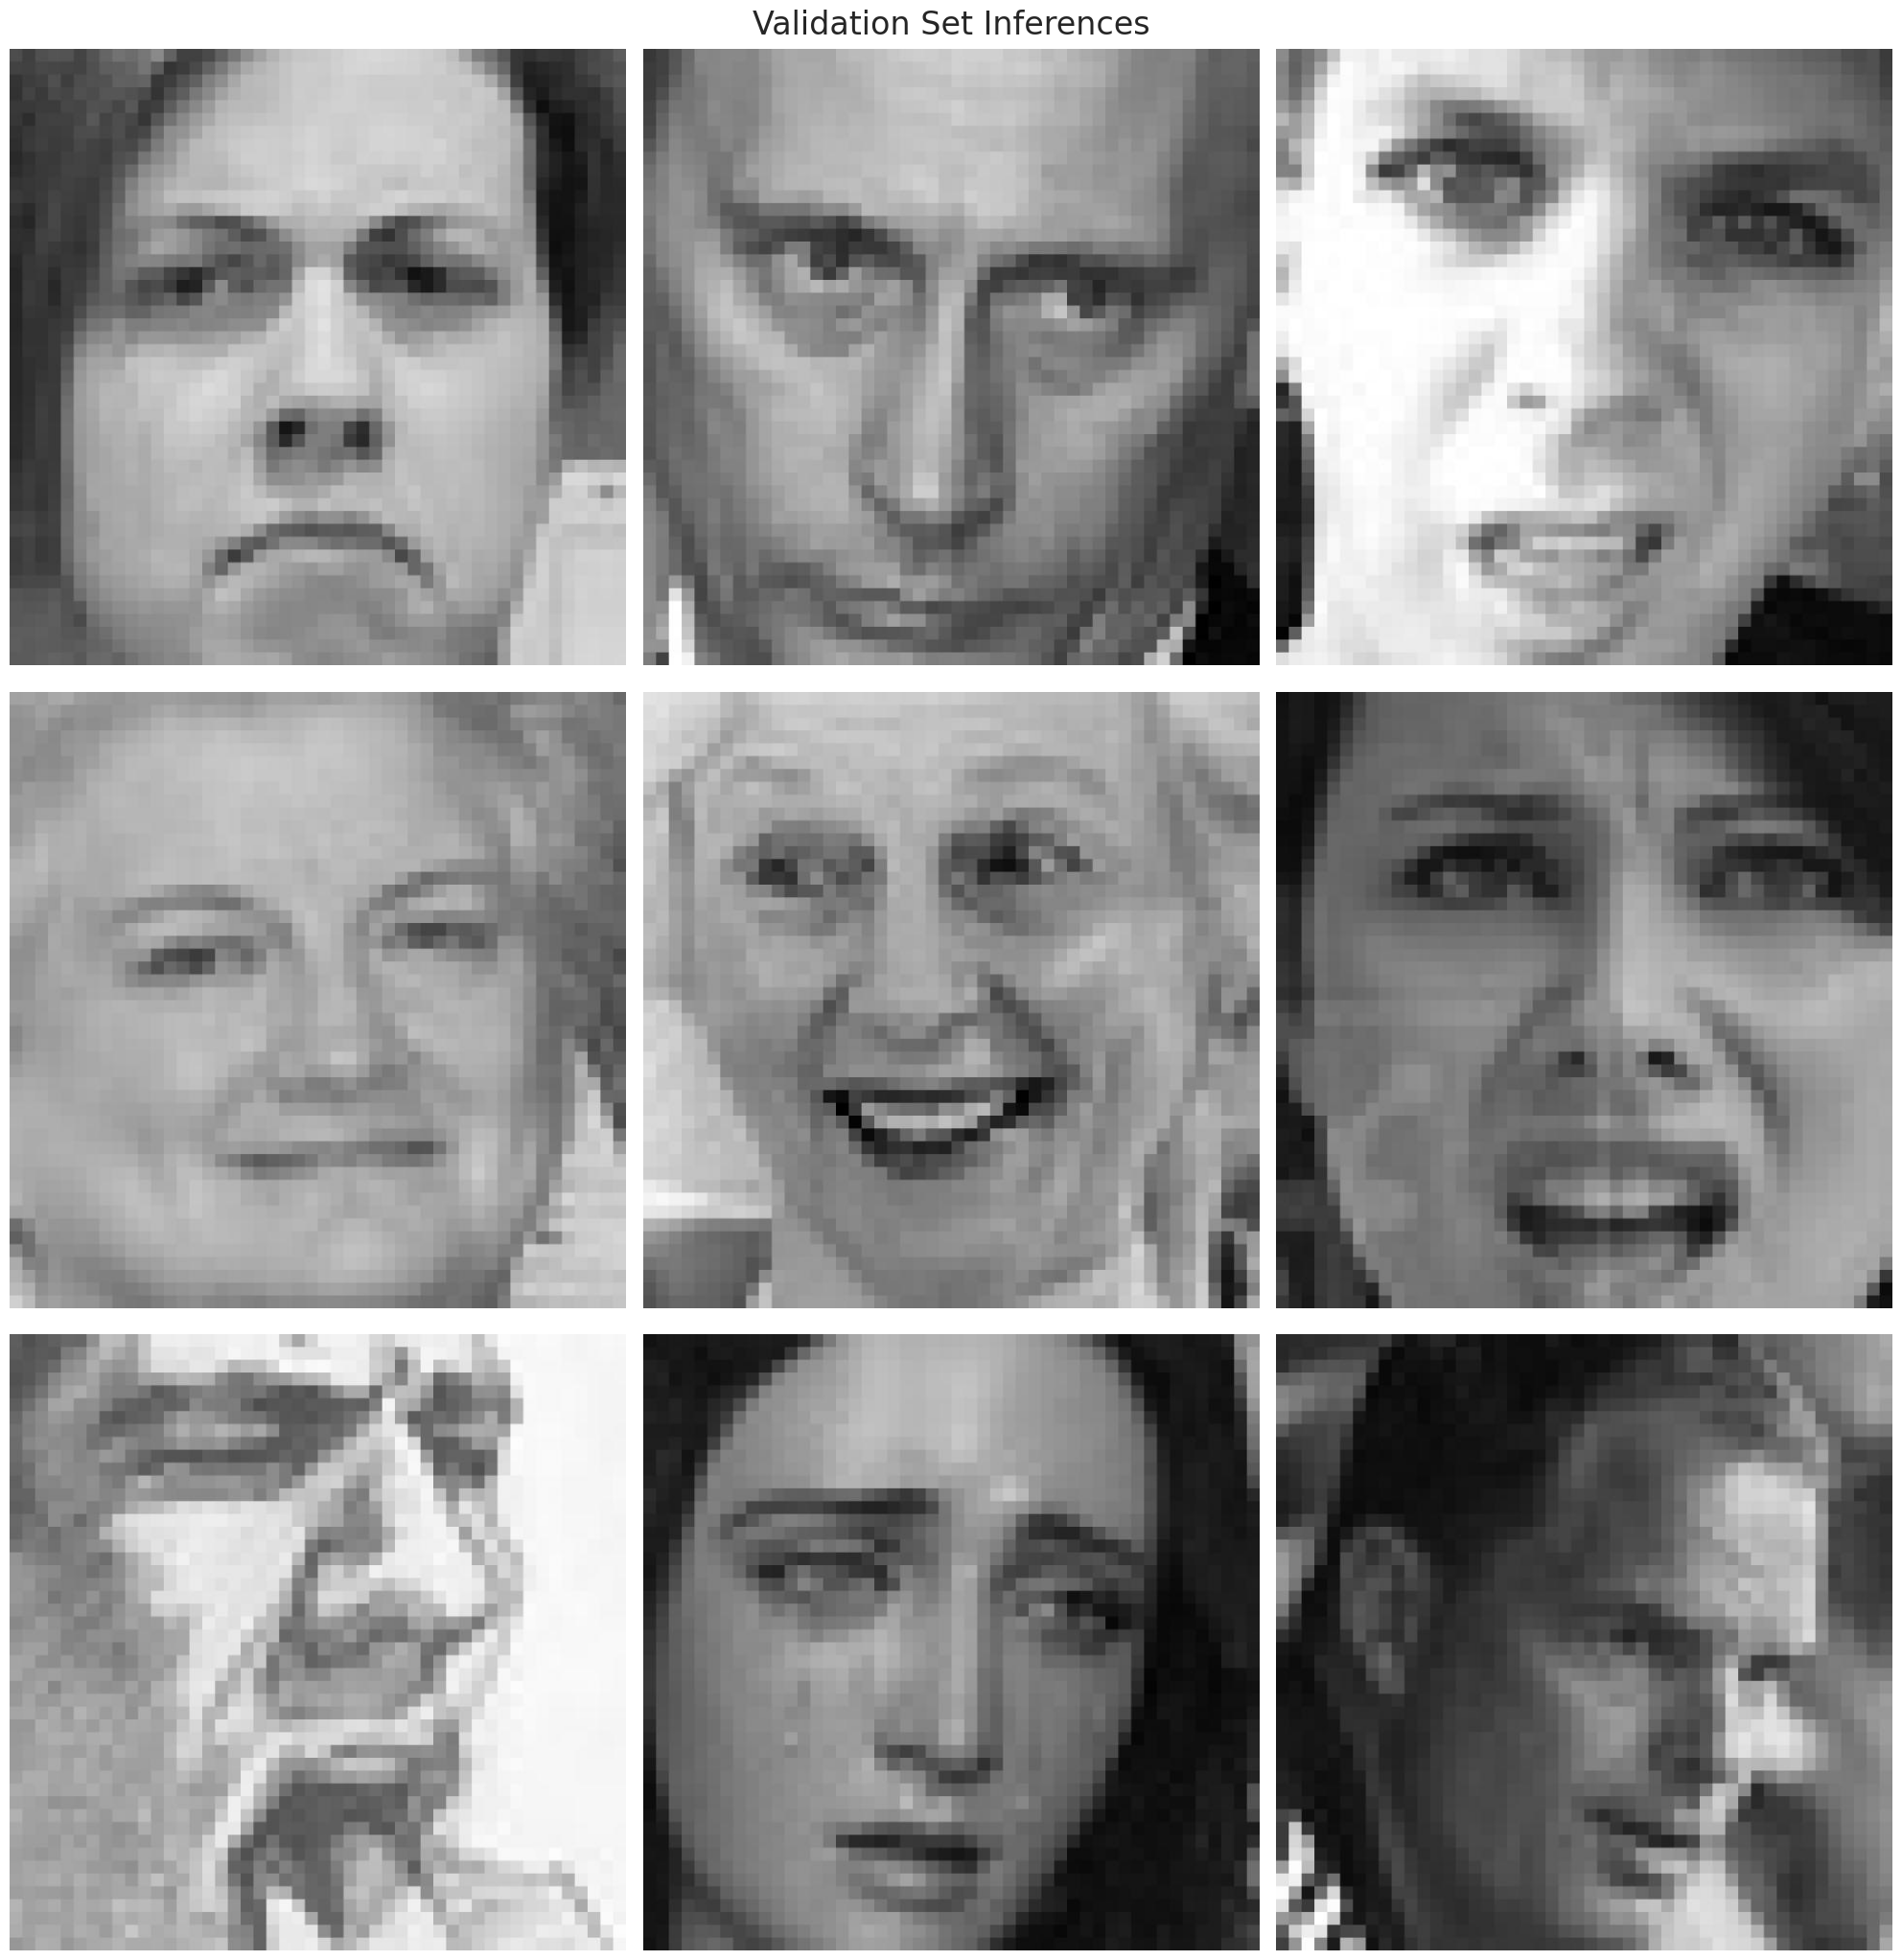

In [15]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/Colab Notebooks/deteksi wajah2.v1i.yolov11'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()